# EDA
## ライブラリのインポート

In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from conf.config import DIRS, PARAMS, CFG
from utils import DataLoader, DataProcesser
from utils.visualize import *

## データの読み込み

In [2]:
# データのロード
dataloader = DataLoader()
train_df, test_df = dataloader.load_data()

# データの前処理
dataprocesser = DataProcesser(train_df, test_df)
trains, X_test = dataprocesser.preprocess()
X_train, y_train = trains["X_train"], trains["y_train"]


train dataの中に欠損値はありませんでした。
test dataの中に欠損値はありませんでした。
Train shape: (90615, 8)   test shape: (60411, 8)


,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
id,,,,,,,,
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975
...,...,...,...,...,...,...,...,...
90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450
90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400
90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815


## データの確認

In [3]:
# データの型
X_train.dtypes

Sex               category
Length             float64
Diameter           float64
Height             float64
Whole weight       float64
Whole weight.1     float64
Whole weight.2     float64
Shell weight       float64
dtype: object

In [4]:
# 欠損値の確認
X_train.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
dtype: int64

In [5]:
# 基本情報
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90615 entries, 0 to 90614
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             90615 non-null  category
 1   Length          90615 non-null  float64 
 2   Diameter        90615 non-null  float64 
 3   Height          90615 non-null  float64 
 4   Whole weight    90615 non-null  float64 
 5   Whole weight.1  90615 non-null  float64 
 6   Whole weight.2  90615 non-null  float64 
 7   Shell weight    90615 non-null  float64 
dtypes: category(1), float64(7)
memory usage: 5.6 MB


In [6]:
# カテゴリ変数 内訳
X_train["Sex"].value_counts()

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64

In [7]:
# 数値データ 要約統計量
X_train.describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


## データの可視化

### 特徴量の相関

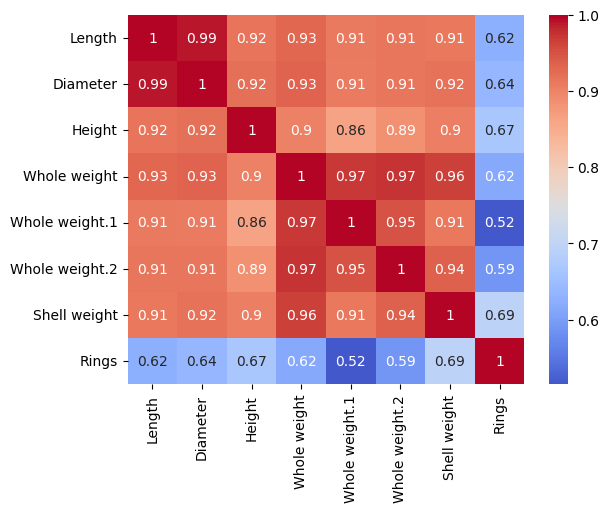

In [8]:
plot_heatmap(df=train_df[CFG.NUMERIC_VARS], numeric_vars=CFG.NUMERIC_VARS)

### ターゲットの分布

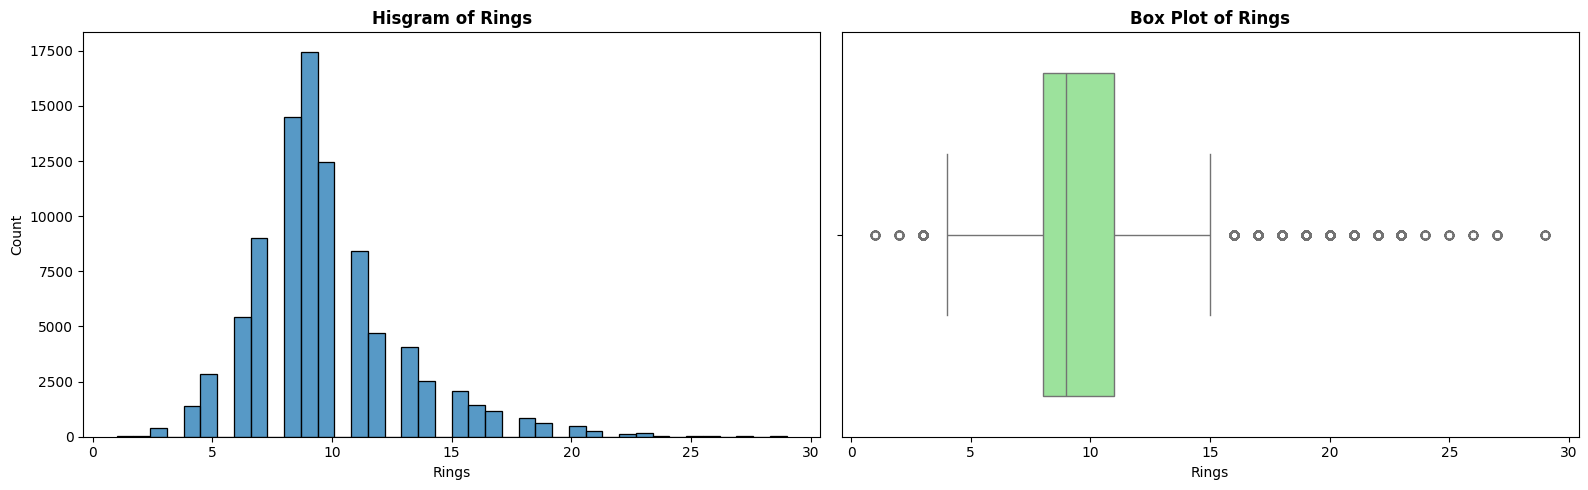

In [9]:
plot_numerics(train_df, ["Rings"])

### 数値データの分布

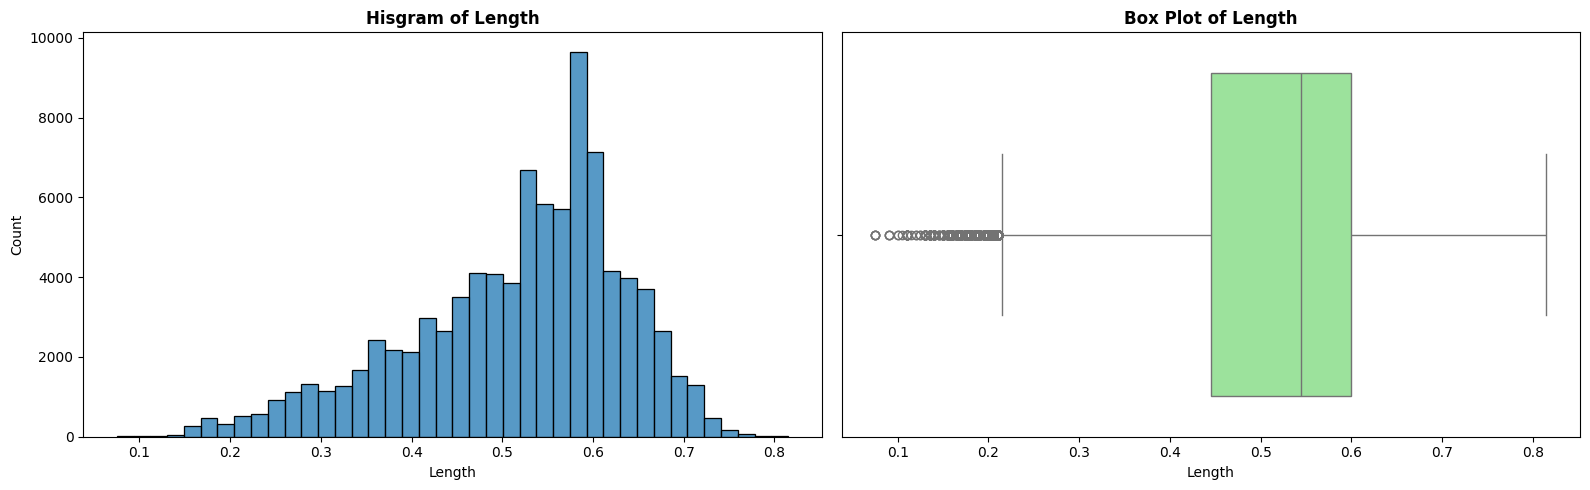

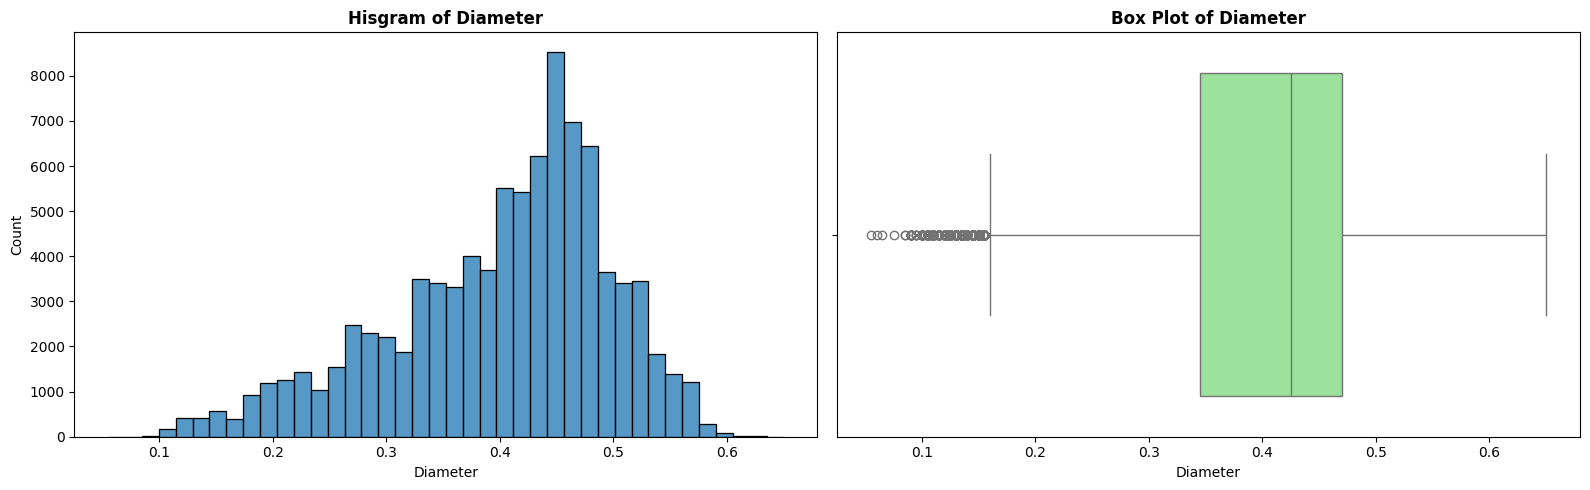

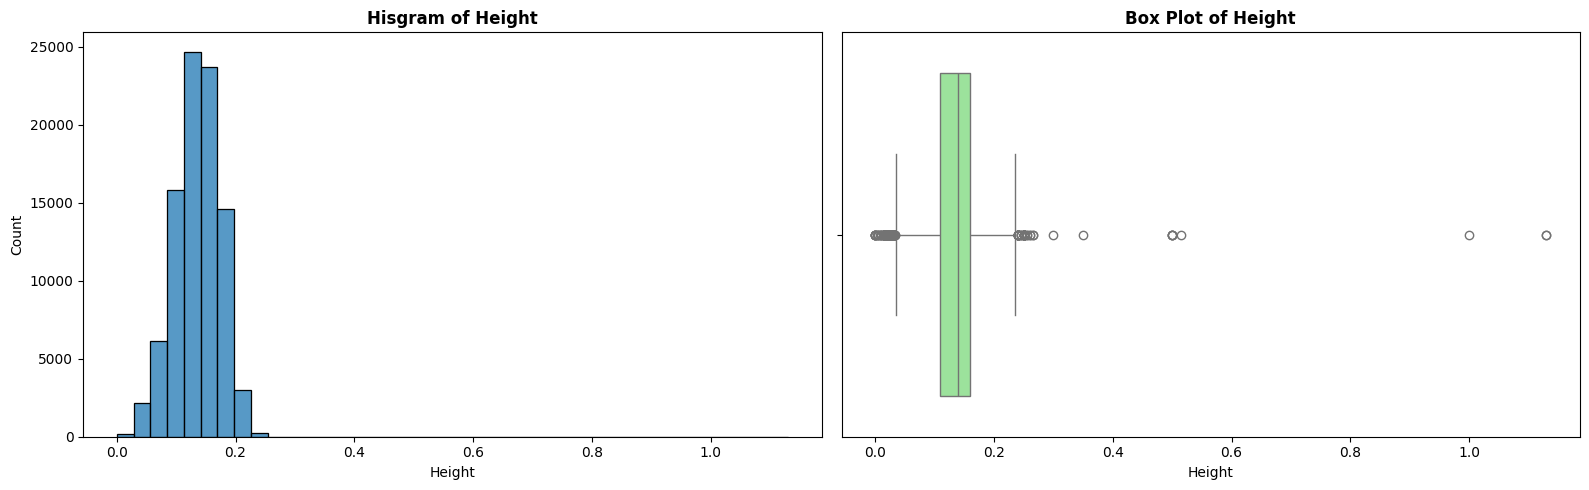

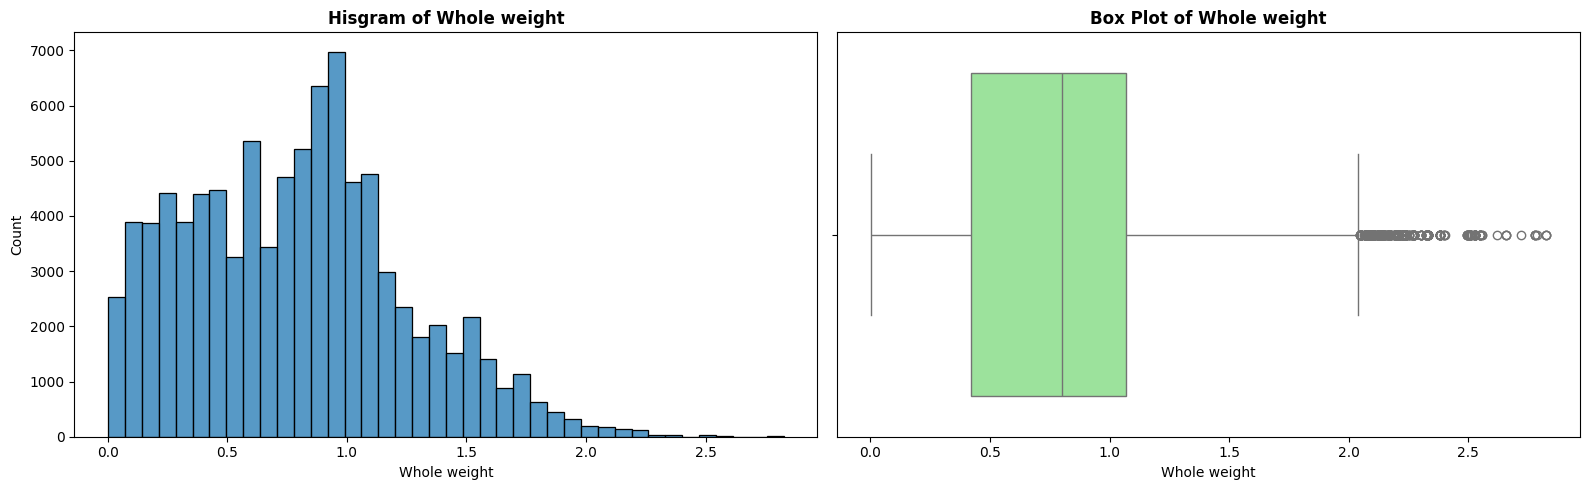

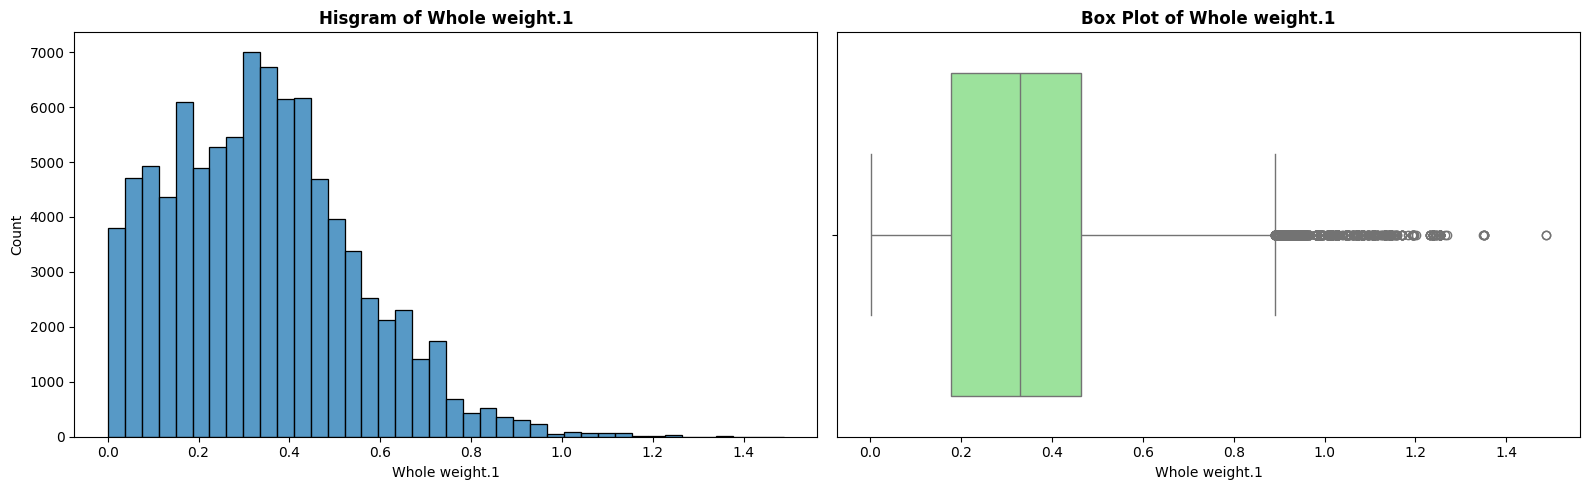

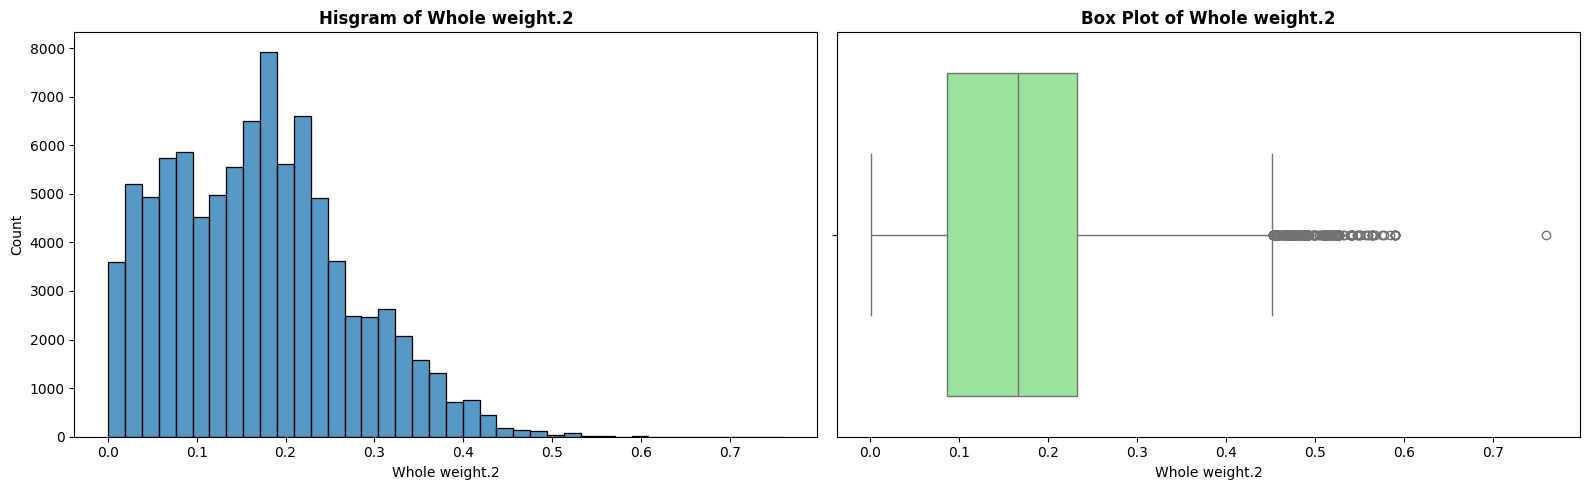

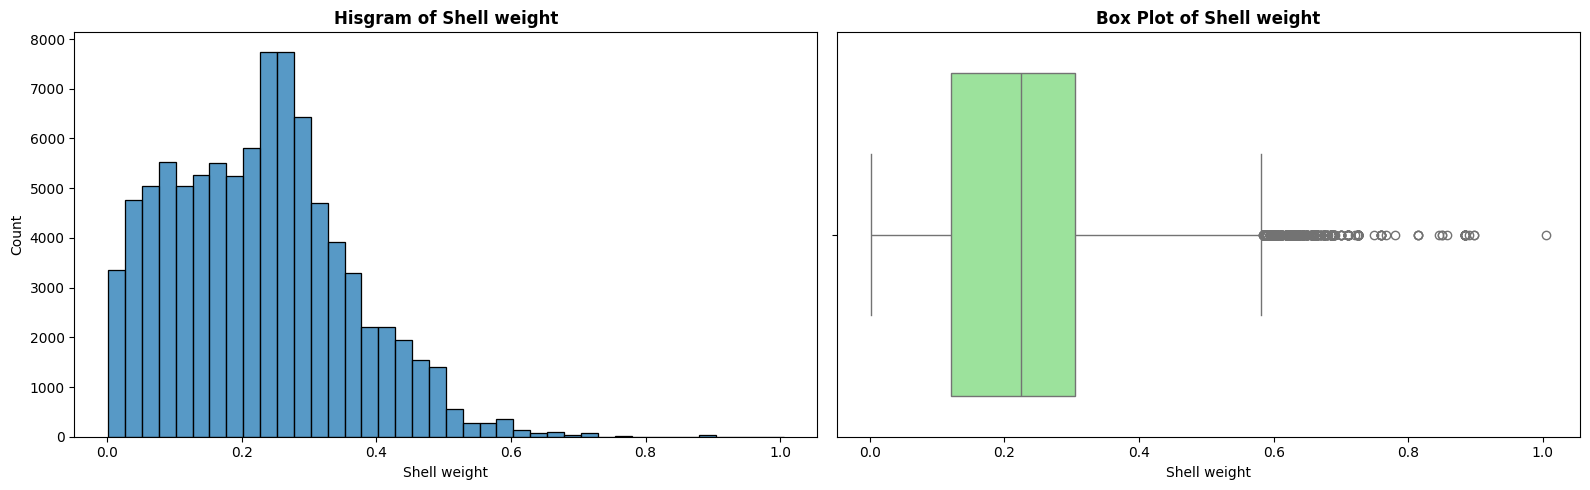

In [10]:
plot_numerics(train_df, CFG.NUMERIC_FEATURES)

### カテゴリ変数の分布

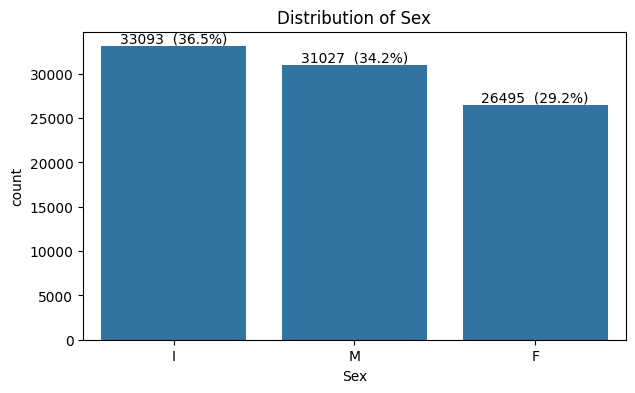

In [11]:
plot_counts(train_df, CFG.CAT_FEATURES)